In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])
# Load the MNIST dataset
# TODO: Download and load the training and test sets using torchvision.datasets

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize some images (Optional)
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [2]:
# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # TODO: Define the layers (Flatten, Fully Connected, Activation functions)
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
# Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Training the network
num_epochs = 5
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.detach().cpu().numpy())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/938], Loss: 0.5412
Epoch [1/5], Step [200/938], Loss: 0.4376
Epoch [1/5], Step [300/938], Loss: 0.3413
Epoch [1/5], Step [400/938], Loss: 0.4376
Epoch [1/5], Step [500/938], Loss: 0.3948
Epoch [1/5], Step [600/938], Loss: 0.6163
Epoch [1/5], Step [700/938], Loss: 0.1647
Epoch [1/5], Step [800/938], Loss: 0.3307
Epoch [1/5], Step [900/938], Loss: 0.3953
Epoch [2/5], Step [100/938], Loss: 0.3136
Epoch [2/5], Step [200/938], Loss: 0.1868
Epoch [2/5], Step [300/938], Loss: 0.1172
Epoch [2/5], Step [400/938], Loss: 0.1598
Epoch [2/5], Step [500/938], Loss: 0.2030
Epoch [2/5], Step [600/938], Loss: 0.2322
Epoch [2/5], Step [700/938], Loss: 0.2923
Epoch [2/5], Step [800/938], Loss: 0.2069
Epoch [2/5], Step [900/938], Loss: 0.0652
Epoch [3/5], Step [100/938], Loss: 0.1389
Epoch [3/5], Step [200/938], Loss: 0.0700
Epoch [3/5], Step [300/938], Loss: 0.0796
Epoch [3/5], Step [400/938], Loss: 0.1641
Epoch [3/5], Step [500/938], Loss: 0.1928
Epoch [3/5], Step [600/938], Loss:

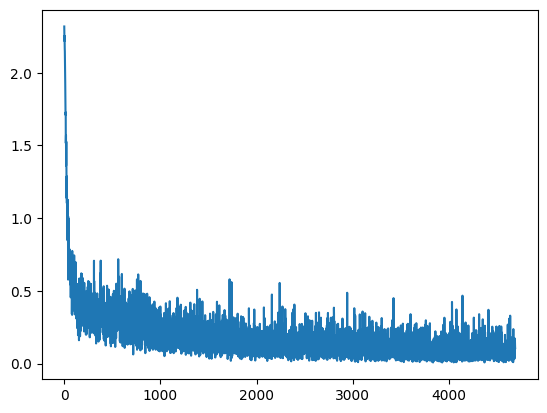

In [8]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

In [6]:
# Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # TODO: Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


    print(f'Accuracy of the network on the test images: {100 * correct / total}%')

Accuracy of the network on the test images: 96.22%


Accuracy: 96.22%
Precision: 0.9628
Recall: 0.9622
F1-Score: 0.9621


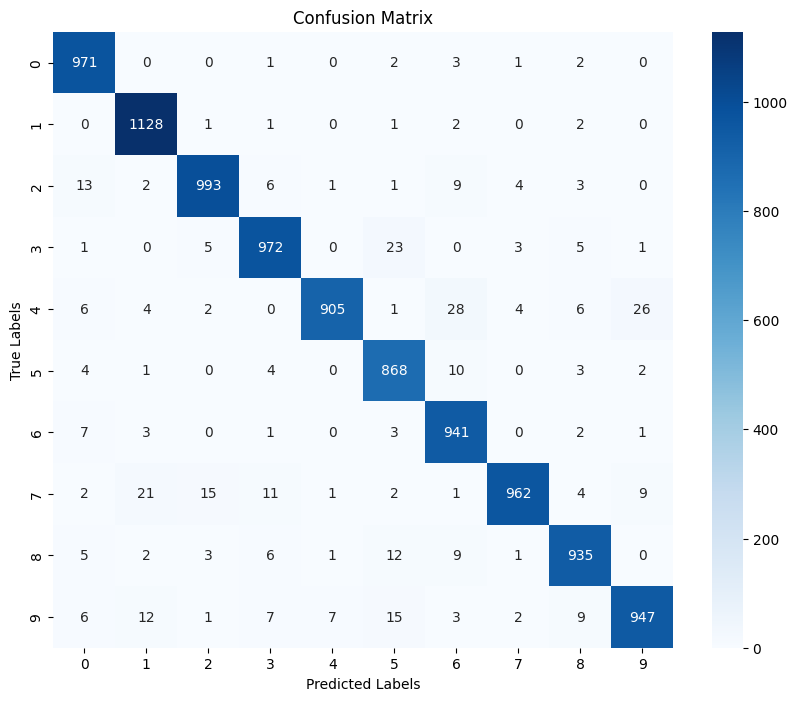

In [7]:
# TODO: Convert predictions and labels to numpy arrays for metric calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# TODO: Confusion matrix calculation
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(len(np.unique(all_labels))),
            yticklabels=range(len(np.unique(all_labels))))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()